<a href="https://colab.research.google.com/github/Udeshi97/DynamoDB/blob/main/spamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [ ]:
import pandas as pd
import nltk

Read Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding="latin-1")

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) 

In [ ]:
df.rename(columns={'v1':'Class','v2':'SMS'},inplace=True)
df.sample(15)

,Class,SMS
537,ham,Or maybe my fat fingers just press all these b...
2502,ham,Ola would get back to you maybe not today but ...
2412,spam,I don't know u and u don't know me. Send CHAT ...
2047,ham,No de. But call me after some time. Ill tell y...
2347,ham,But i dint slept in afternoon.
1606,ham,Ok no prob... I'll come after lunch then...
5447,ham,So that takes away some money worries
1833,ham,When should I come over?
4294,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
5444,ham,Good morning. At the repair shop--the ONLY rea...


In [ ]:
df.groupby('Class').describe()

SMS                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
df=df.drop_duplicates(keep="first")

In [ ]:
df.groupby('Class').describe()

SMS                                                               
      count unique                                                top freq
Class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

Data visualization


In [ ]:
df['Length']=df['SMS'].apply(len)

In [ ]:
df.head(2)

,Class,SMS,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d25c5dcd0>,
      dtype=object)

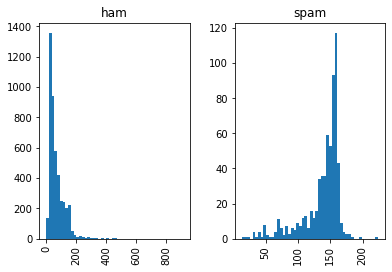

In [ ]:
df.hist(column="Length",by="Class",bins=50)

Step 2-Preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head(5)

,Class,SMS,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing tasks


*   Lowercase
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming


In [ ]:

import string

def clean_text(text):
      text=text.lower()
      text=nltk.word_tokenize(text)

      y=[]
      for i in text:
        if i.isalnum():
          y.append(i)

      text=y[:]
      y.clear()

      for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

      text=y[:]
      y.clear()

      for i in text:
        y.append(ps.stem(i))

      return" ".join(y)

In [ ]:
df["sms_cleaned"]=df["SMS"].apply(clean_text)

In [ ]:
df.head(5)

,Class,SMS,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


Step 3- Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tf_vec=TfidfVectorizer(max_features=3000)
x=tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y=df['Class'].values

Step 4-Learning

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9709864603481625
